# **Data analysis and prediction on Iris dataset**

In this notebook, we focus on  [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) and do the following tasks:


1.   Load Iris from [sklearn](https://scikit-learn.org/stable/)
2.   Analyze the dataset
3.   Train a linear perceptron neural network and predict the type of flower

### About Iris Dataset
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

### Import libraries
The following libraries are needed for the goal:


*   numpy (getting input and output of network with numpy array)
*   pandas (calculating data with pandas dataframe)
*   matplotlib (showing figures)
*   seaborn (using charts)
*   torch (using neural network and its functions)




In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

import torch
import torch.nn as nn


### **Load Iris**
At first, load Iris dataset from sklearn.datasets. It contains features as data, flower type as target, types of flowers as target_names and flower features as feature_names.

In the second step, data and target are concatenated and generate the dataframe. 

In the third step, a column called *id* is added to the dataframe, evaluated with *df.index*. This column will be used in neural network for generating train and test dataset.

At the end, we have a dataset with 150 rows and 6 columns.

It is clear that there are 4 features of flowers containing sepal length(cm), sepal width(cm),	petal length(cm) and 	petal width(cm). There are also 3 types of flowers containing setosa, versicolor and virginica shown as 0, 1 and 2 in database respectively.


In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df['id'] = df.index
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,id
0,5.1,3.5,1.4,0.2,0.0,0
1,4.9,3.0,1.4,0.2,0.0,1
2,4.7,3.2,1.3,0.2,0.0,2
3,4.6,3.1,1.5,0.2,0.0,3
4,5.0,3.6,1.4,0.2,0.0,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   id                 150 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 7.2 KB


### **Data analysis**
The following figure will show us a clear picture of dataset. We categorized the flower type based on different features of flowers. As you may notice, flowers are classified very well in all cases. There is only one exception. In the case of sepal length and sepal width, versicolor and virginica are not separeted very well. 

The figure guided us, this can be a good classification task. If we build a suitable neural network, we may get good results.

In [4]:
# Old way. show paiplot with plt.subplot

# fig , axes = plt.subplots(2,3,figsize = (18, 10))
# sns.scatterplot(x = "sepal length (cm)", y = "sepal width (cm)", data = df
# , hue="target",palette = sns.color_palette("tab10",n_colors=3), ax=axes[0,0],s=60)
# sns.scatterplot(x = "sepal length (cm)", y = "petal length (cm)", data = df
# , hue="target",palette = sns.color_palette("tab10",n_colors=3), ax=axes[0,1],s=60)
# ....
# plt.tight_layout()
# plt.show()

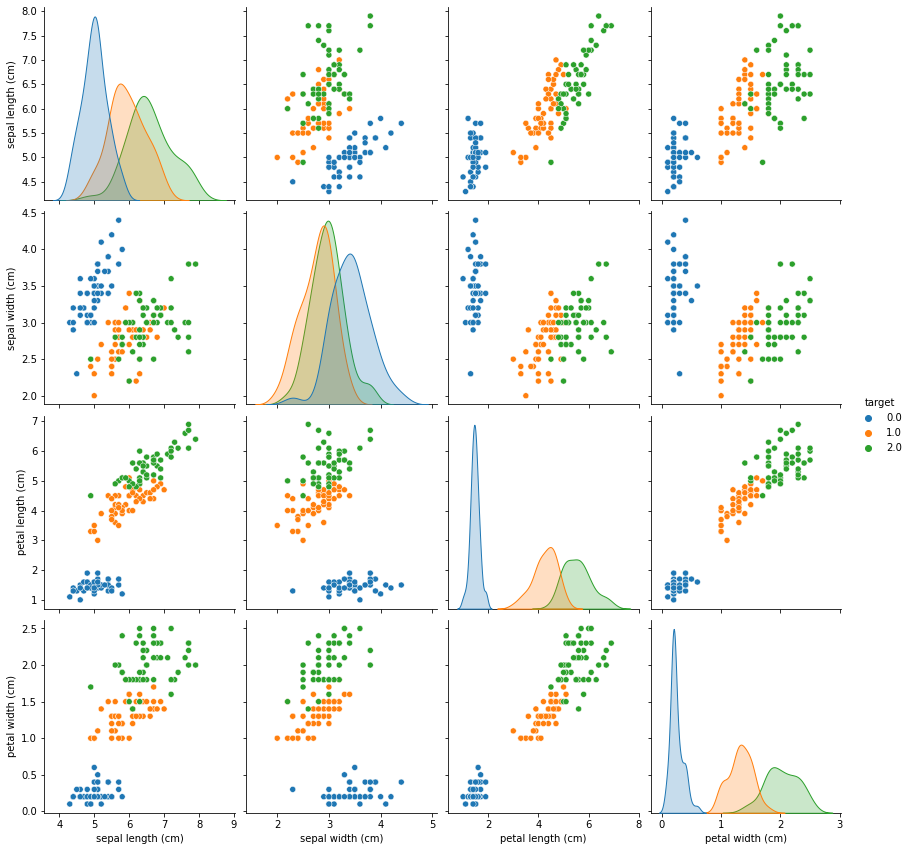

In [5]:

df_copy = df.copy()
df_copy.drop('id', inplace=True, axis=1)
sns.pairplot(df_copy, hue='target', height=3,palette = sns.color_palette("tab10",n_colors=3));

From the next figure, we can find out that we have 50 samples of each flower type. It explains that we should choose 3 equal subsets of data (according to flower type) for our neural network training data set.

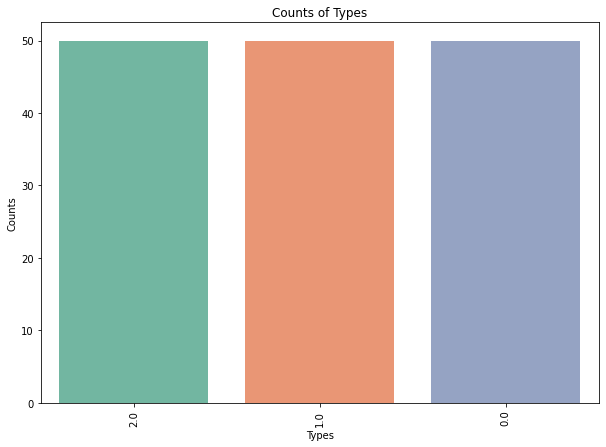

In [6]:
plt.figure(figsize= (10, 7))
sns.countplot(x = "target", data = df, palette = sns.color_palette("Set2", 18)
      , order=df['target'].value_counts().index)
plt.xlabel("Types")
plt.ylabel("Counts")
plt.title("Counts of Types")
plt.xticks(rotation = "vertical")
plt.show()

### **Neural network**
In this section, a neural network with the following structure will be built. 


*   A three layer neural network.
*   Input layer has 4 neurons.
*   There is 1 hidden layer with 10 neurons.
*   Output layer has 3 nodes.
*   Train data contains 120 records.
*   Test(validation) data contains 30 samples, selected randomly.


### Train and Test data selection
As we saw before, there are 3 equal groups of data for each flower type, so we should build our train and test dataset in this order. The size of train and test datasets are 120 and 30 respectively. At first, we need to get 10 random samples from each flower type for test dataset. By removing the test dataset from the whole data, train dataset is obtained. We use *id* column for this purpose. At the end, by separating datasets into features and target we will have 4 datasets:

*   train_data_x (input of NN for train dataset)
*   train_data_y (actural output of train dataset)
*   test_data_x  (input of NN for test dataset)
*   test_data_y  (actual output of test dataset)




In [7]:
df_copy = df.copy()

# Get 10 random samples for test
test0 = df_copy.loc[df['target'] == 0].sample(10)
test1 = df_copy.loc[df['target'] == 1].sample(10)
test2 = df_copy.loc[df['target'] == 2].sample(10)

# Create test and train data
test_data_temp = test0.append(test1).append(test2)
train_data_temp = df.copy()

# Remove test data from data and generate train data
cond = train_data_temp['id'].isin(test_data_temp['id'])
train_data_temp.drop(train_data_temp[cond].index, inplace = True)

# Convert test and train into numbers
train_data = train_data_temp.to_numpy()
test_data = test_data_temp.to_numpy()

train_data_x = train_data[:,:4]
train_data_y = train_data[:,4]

test_data_x = test_data[:,:4]
test_data_y = test_data[:,4]

In [8]:
# To generate the same random numbers in all runs 
# torch.manual_seed(1234)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,id
0,5.1,3.5,1.4,0.2,0.0,0
1,4.9,3.0,1.4,0.2,0.0,1
2,4.7,3.2,1.3,0.2,0.0,2
3,4.6,3.1,1.5,0.2,0.0,3
4,5.0,3.6,1.4,0.2,0.0,4


Now we should set the NN parameters. The parameters contain:


*   Input layer nodes
*   Output layer nodes
*   Hidden layer nodes
*   Learning rate
*   Number of epochs



In [9]:
# Input layer
inl = 4
# Output layer
outl = 3
# Numbers of hidden layer nodes
hl = 10
# Learning rate
lr = 0.01
# Iteration/epoch number
num_epoch = 500

Then we can build our model. It contains 2 [linear NN](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) with [Relu activation function](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html). Due to the multi classification task we have, [CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) seems essential for loss function and thanks to the light weight dataset, we can use [Stochastic Gradient Descent](https://pytorch.org/docs/stable/optim.html) as optimizer.

In [10]:
# Build model
model = torch.nn.Sequential(
        torch.nn.Linear(inl, hl),
        torch.nn.ReLU(),
        torch.nn.Linear(hl, outl)
)

# Loss function and optimize
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In a for loop, neural network is feeded by train dataset and is tested by test data. In every 50 loops, loss and accuracy values are calculated and printed. We can trace those values to explain the behavior of our network.

In [11]:
for each in range(num_epoch):
  # Convert data to tensor
  X = torch.Tensor(train_data_x).float()
  Y = torch.Tensor(train_data_y).long()

  Xt = torch.Tensor(test_data_x).float()
  Yt = torch.Tensor(test_data_y).float()

  # Clear gradiant tensor
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_func(y_pred, Y)

  loss.backward()
  optimizer.step() 

  if each % 50 == 0  or each == num_epoch - 1:
      test_out = model(Xt)
      predicted = torch.max(test_out.data, 1)

      #get accuration
      print('Epoch {:03d}:'.format(each+1), 'Loss = {:.3f}'.format(loss.item()),
            '| Accuracy = {:.2f}'
                .format((100 * torch.sum(Yt == predicted.indices) / 30).item())
          )  

Epoch 001: Loss = 1.328 | Accuracy = 33.33
Epoch 051: Loss = 0.869 | Accuracy = 66.67
Epoch 101: Loss = 0.739 | Accuracy = 70.00
Epoch 151: Loss = 0.632 | Accuracy = 70.00
Epoch 201: Loss = 0.553 | Accuracy = 73.33
Epoch 251: Loss = 0.496 | Accuracy = 83.33
Epoch 301: Loss = 0.452 | Accuracy = 90.00
Epoch 351: Loss = 0.417 | Accuracy = 90.00
Epoch 401: Loss = 0.387 | Accuracy = 90.00
Epoch 451: Loss = 0.361 | Accuracy = 90.00
Epoch 500: Loss = 0.338 | Accuracy = 90.00


**As nutshell**, best average best accuracy obtained in *100* runs with different test dataset is *93.33*.
As you may noticed in data analysis section, due to dataset shape, it seems that clustering methods (like [K-means](https://en.wikipedia.org/wiki/K-means_clustering)) may also work well on Iris dataset.